In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

import numpy as np

In [2]:
import pickle
Plot_data=pickle.load(open("ScV6Sn6_XTEC_plot_data.p", "rb" ))


# set colors, line style, markers etc. of each cluster


In [3]:

color_list = ['firebrick', 'teal', 'gainsboro']

marker_list=['o','s',None]
line_list=['-','--',':']
lw_list=[5,5,4]


# Plot cluster mean and variance with recaled intensities

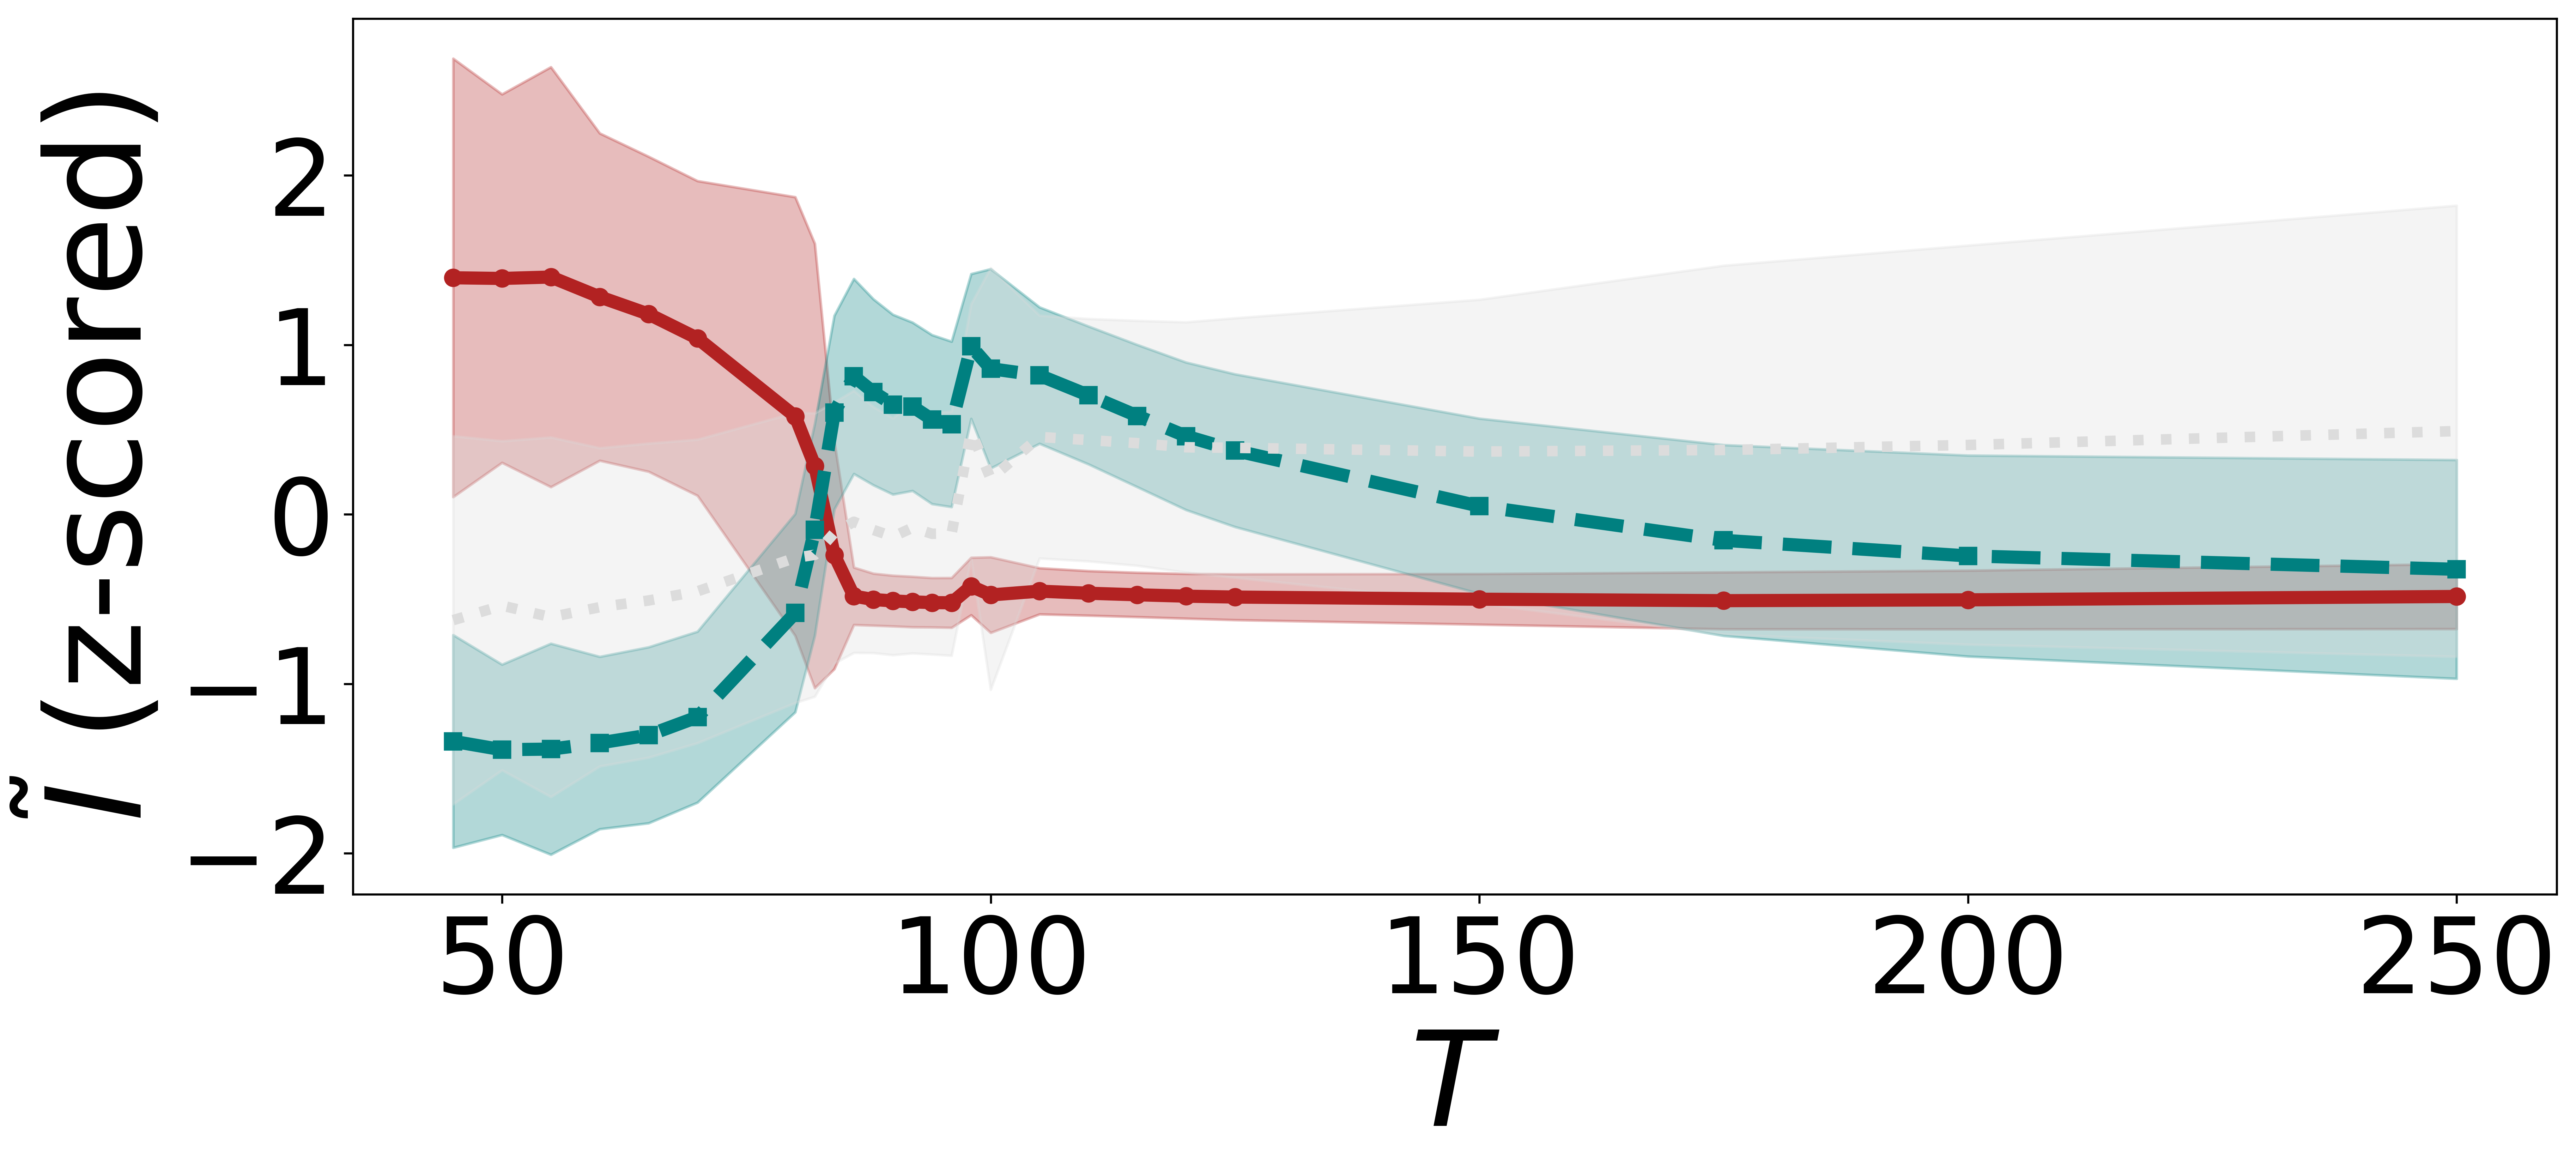

In [4]:
plt.figure(figsize=(15,6),dpi=600)
ax = plt.gca()

Temp=Plot_data['Temp']
cluster_mean=Plot_data['rescaled_I_mean']
cluster_std=Plot_data['rescaled_I_std']
n_clusters=Plot_data['n_clusters']


for i in range(n_clusters):
    yc=cluster_mean[i]
    yc_std=cluster_std[i]
    plt.plot(Temp,yc,color=color_list[i], linestyle=line_list[i],marker=marker_list[i],lw=lw_list[i]);
    plt.gca().fill_between(Temp,yc-yc_std,yc+ yc_std, color=color_list[i],alpha=0.3)

plt.xlabel(f'$T$',size=50)
plt.ylabel(r'$\tilde{I}$ (z-scored)',size=50)
#plt.title(r'Cluster mean and std',size=50)


plt.xticks(size=40);
plt.yticks(size=40);





# Plot Intensity averaged over all trajectories in each cluster 

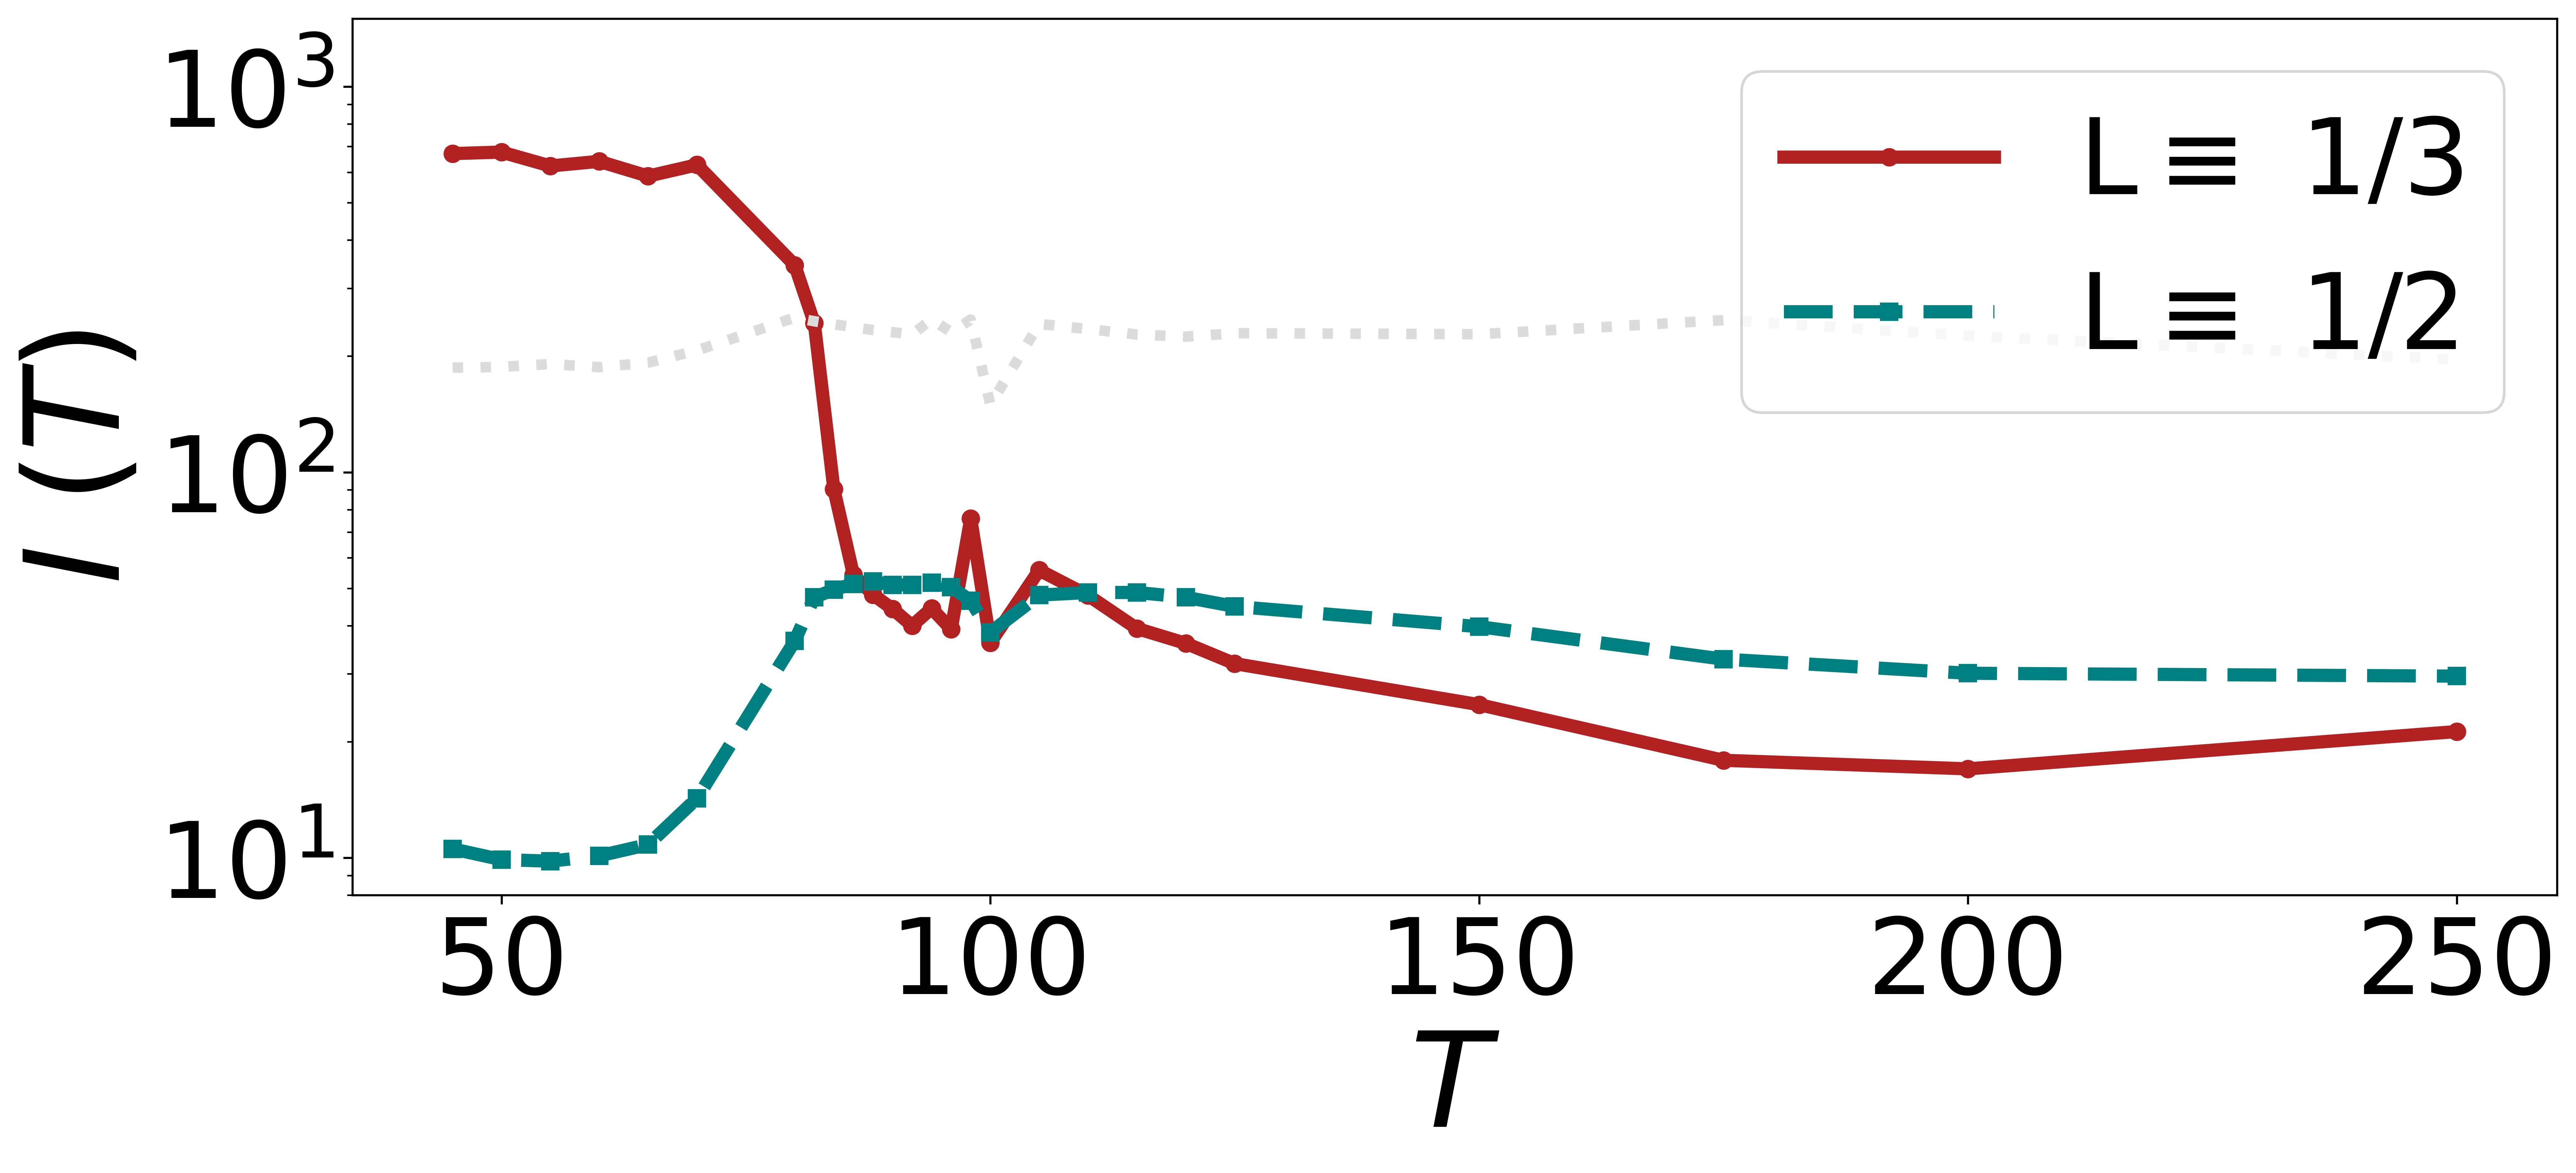

In [14]:
I_cluster_avg=Plot_data['Average_I']


plt.figure(figsize=(15,6),dpi=600)
legends=[r'L$\equiv$ 1/3',r'L$\equiv$ 1/2',None]*5
for i in (range(n_clusters)):

    yc=I_cluster_avg[i]
    plt.plot(Temp,yc,color=color_list[i], linestyle=line_list[i],marker=marker_list[i],lw=lw_list[i],label=legends[i]);
    
    
plt.xlabel(f'$T$',size=50)
plt.ylabel(r'$I$ ($T$)',size=50)
#plt.title(r'Average cluster intensity',size=50)
plt.legend(fontsize=40,frameon=True)
plt.ylim([8,1500])
plt.yscale('log')

plt.xticks(size=40);
plt.yticks(size=40);


# plot distribution of pixels

In [18]:
[Qh,Qk, Ql]= Plot_data['Qh_Qk_Ql']
[H_1BZ,K_1BZ, L_1BZ]= Plot_data['Q_1BZ']

In [74]:
HK_1BZ={}
for i in range(n_clusters):
    HK_1BZ[i]=np.hstack([H_1BZ[i],K_1BZ[i]]) 

In [77]:
def plot_Q_hist(ax_id):
    
    
    if ax_id==0 :
        y=H_1BZ
        
    if ax_id==1 :
        y=K_1BZ
        
    if ax_id==2 :
        y=L_1BZ
        

    if ax_id==-1 :
        y=HK_1BZ
    
    

    for i in range(n_clusters):
        
        plt.figure(figsize=(4,3))
        sns.histplot(data=y[i], stat='probability',bins=40, kde=True,kde_kws={'gridsize':50},edgecolor=None, color=color_list[i],line_kws={'linewidth': 3})
    
        plt.yscale("linear")
        if ax_id==2:
            plt.xlabel(r'$L$ (reduced zone)',size=20)
        if ax_id==1:
            plt.xlabel(r'$K$ (reduced zone)',size=20)
        if ax_id==0:
            plt.xlabel(r'$H$ (reduced zone)',size=20)
        if ax_id==-1:
            plt.xlabel(r'$H$,$K$ (reduced zone)',size=20)
        
        
        
        plt.ylabel('Pixel density',size=20)
        plt.xlim([0,1])
        plt.xticks(ticks=[0,0.33,0.5,0.67,1],labels=['0','1/3','1/2','2/3','1'],size=18)
        plt.ylim([0,0.12])
        plt.yticks(size=0)
    
        ax=plt.gca()
        ax.yaxis.grid(False) # Hide the horizontal gridlines
        ax.xaxis.grid(True)
        ax.yaxis.set_major_locator(MultipleLocator(0.2))

        

# distribution along L

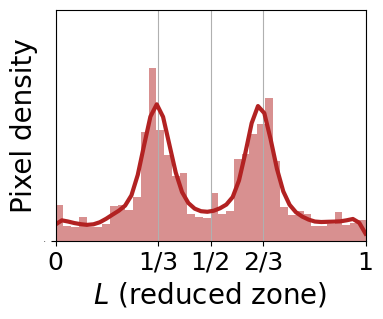

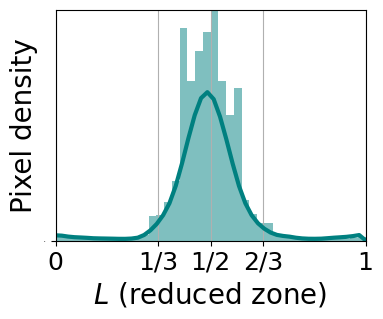

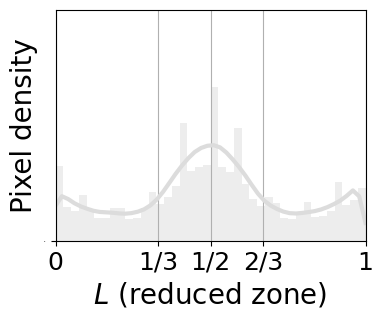

In [78]:
plot_Q_hist(2)

# distribution along H and K

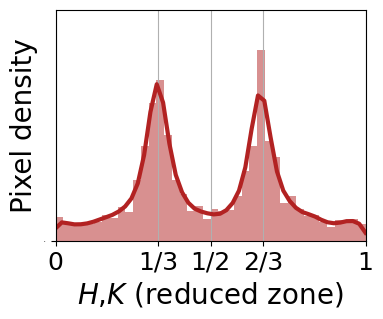

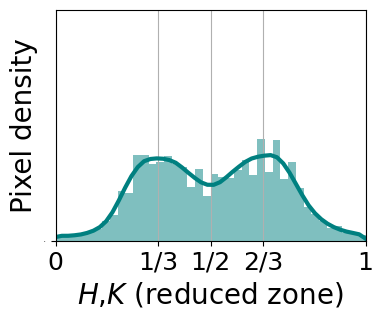

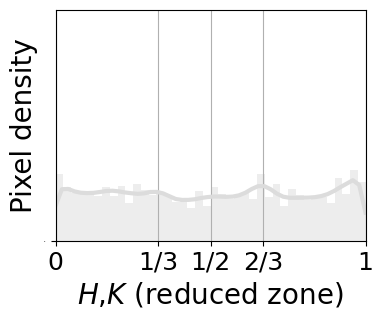

In [79]:
plot_Q_hist(-1)

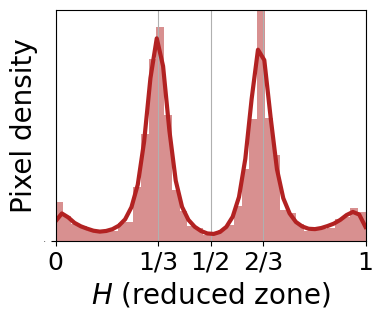

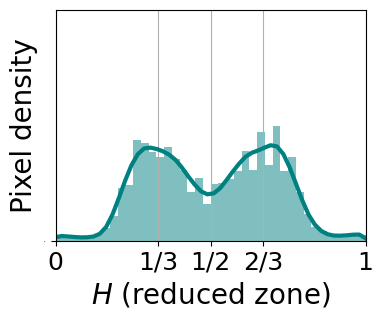

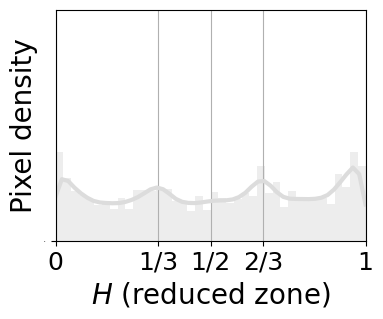

In [80]:
plot_Q_hist(0)

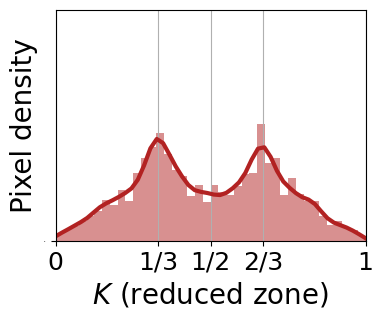

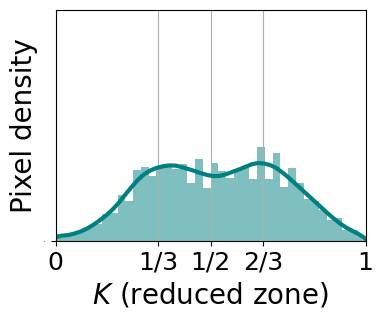

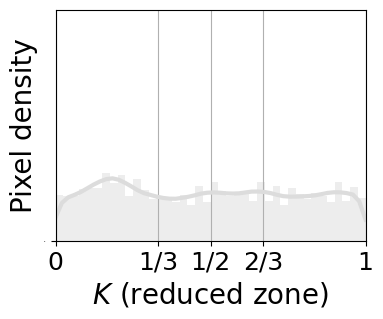

In [81]:
plot_Q_hist(1)

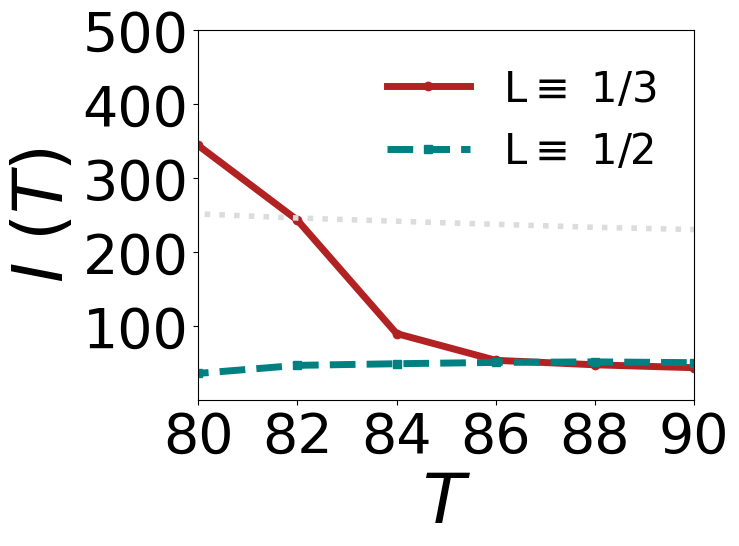

In [13]:
I_cluster_avg=Plot_data['Average_I']


plt.figure()
legends=[r'L$\equiv$ 1/3',r'L$\equiv$ 1/2',None]*5
for i in (range(n_clusters)):

    yc=I_cluster_avg[i]
    plt.plot(Temp,yc,color=color_list[i], linestyle=line_list[i],marker=marker_list[i],lw=lw_list[i],label=legends[i]);
    
    
plt.xlabel(f'$T$',size=50)
plt.ylabel(r'$I$ ($T$)',size=50)
#plt.title(r'Average cluster intensity',size=50)
plt.legend(fontsize=30,frameon=False)
plt.xlim([80,90])
plt.ylim([1,500])
plt.xticks(size=40);
plt.yticks(size=40);
